In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./AnonymityPoll.csv
./Internet Privacy Survey Analysis.ipynb
./.ipynb_checkpoints\Internet Privacy Survey Analysis-checkpoint.ipynb


In [2]:
data = pd.read_csv('AnonymityPoll.csv')

In [3]:
data.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
4,0.0,NaN,Female,80.0,Georgia,South,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Internet.Use            1001 non-null   float64
 1   Smartphone              959 non-null    float64
 2   Sex                     1002 non-null   object 
 3   Age                     975 non-null    float64
 4   State                   1002 non-null   object 
 5   Region                  1002 non-null   object 
 6   Conservativeness        940 non-null    float64
 7   Info.On.Internet        792 non-null    float64
 8   Worry.About.Info        790 non-null    float64
 9   Privacy.Importance      787 non-null    float64
 10  Anonymity.Possible      753 non-null    float64
 11  Tried.Masking.Identity  784 non-null    float64
 12  Privacy.Laws.Effective  894 non-null    float64
dtypes: float64(10), object(3)
memory usage: 101.9+ KB


### Survey Count: 1002

In [5]:
data.Smartphone.value_counts()

1.0    487
0.0    472
Name: Smartphone, dtype: int64

In [6]:
data.Smartphone.isnull().value_counts()

False    959
True      43
Name: Smartphone, dtype: int64

### People that use Smartphone: 487

### People that don't use a Smartphone: 472

### People that did not respond: 43

In [7]:
pd.crosstab(data.Sex, columns = data.Region)

Region,Midwest,Northeast,South,West
Sex,,,,
Female,123,90,176,116
Male,116,76,183,122


In [8]:
pd.crosstab(data.State, columns = data.Region)

Region,Midwest,Northeast,South,West
State,,,,
Alabama,0,0,11,0
Arizona,0,0,0,24
Arkansas,0,0,10,0
California,0,0,0,103
Colorado,0,0,0,19
Connecticut,0,8,0,0
Delaware,0,0,6,0
District of Columbia,0,0,2,0
Florida,0,0,42,0


### US States in the Midwest Census Region: Kansas, Ohio, Missouri

### US State in the South Census Region with the Largest Number of Interviewees: Texas

In [9]:
pd.crosstab(data['Internet.Use'], columns = data.Smartphone)

Smartphone,0.0,1.0
Internet.Use,,
0.0,186,17
1.0,285,470


### People that haven't used the Internet and a Smartphone: 186

### People that have used the Internet and a Smartphone: 470 

### People that have used the Internet but not a Smartphone: 285 

### People that haven't used the Internet but used a Smartphone: 17

In [10]:
data.isnull().sum()

Internet.Use                1
Smartphone                 43
Sex                         0
Age                        27
State                       0
Region                      0
Conservativeness           62
Info.On.Internet          210
Worry.About.Info          212
Privacy.Importance        215
Anonymity.Possible        249
Tried.Masking.Identity    218
Privacy.Laws.Effective    108
dtype: int64

### People that did not respond on their Internet Usage: 1

### People that did not respond on the Availability of a Smartphone: 43

In [11]:
limited = data[(data['Internet.Use'] == 1) | data.Smartphone == 1]

In [12]:
limited.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
5,1.0,1.0,Male,49.0,Tennessee,South,4.0,6.0,0.0,88.888889,1.0,1.0,0.0


In [13]:
limited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Internet.Use            792 non-null    float64
 1   Smartphone              772 non-null    float64
 2   Sex                     792 non-null    object 
 3   Age                     770 non-null    float64
 4   State                   792 non-null    object 
 5   Region                  792 non-null    object 
 6   Conservativeness        747 non-null    float64
 7   Info.On.Internet        792 non-null    float64
 8   Worry.About.Info        790 non-null    float64
 9   Privacy.Importance      787 non-null    float64
 10  Anonymity.Possible      753 non-null    float64
 11  Tried.Masking.Identity  784 non-null    float64
 12  Privacy.Laws.Effective  727 non-null    float64
dtypes: float64(10), object(3)
memory usage: 86.6+ KB


In [14]:
limited.isnull().sum()

Internet.Use               0
Smartphone                20
Sex                        0
Age                       22
State                      0
Region                     0
Conservativeness          45
Info.On.Internet           0
Worry.About.Info           2
Privacy.Importance         5
Anonymity.Possible        39
Tried.Masking.Identity     8
Privacy.Laws.Effective    65
dtype: int64

### People in the New Data Frame: 792

### Features with Missing Values in the Data Frame: 

### Smartphone, Age, Conservativeness, Worry.About.Info, Privacy.Importance, Anonymity.Possible, Tried.Masking.Identity, Privacy.Laws.Effective

In [15]:
data['Info.On.Internet'].mean()

3.7954545454545454

### Info.On.Internet Average: 3.795

In [16]:
data['Info.On.Internet'].value_counts()

0.0     105
4.0     104
3.0     101
2.0      95
5.0      94
1.0      84
6.0      67
7.0      63
8.0      40
9.0      18
10.0     13
11.0      8
Name: Info.On.Internet, dtype: int64

### Frequency of 'Zero' in Info.On.Internet: 105

### Frequency of Max Value in Info.On.Internet: 8

### Percentage of People Concerned about their Information on the Internet: 0.4886

In [17]:
data['Worry.About.Info'].value_counts()

0.0    404
1.0    386
Name: Worry.About.Info, dtype: int64

In [18]:
(data['Worry.About.Info'].value_counts()[1])/data['Worry.About.Info'].count()

0.48860759493670886

In [19]:
(data['Anonymity.Possible'].value_counts()[1])/data['Anonymity.Possible'].count()

0.3691899070385126

### People that think it is Possible to be Anonymous on the Internet: 0.3692

In [20]:
(data['Tried.Masking.Identity'].value_counts()[1])/data['Tried.Masking.Identity'].count()

0.16326530612244897

### Percentage of People that have Tried Identity Masking: 0.1632653

In [21]:
(limited['Privacy.Laws.Effective'].value_counts()[1])/limited['Privacy.Laws.Effective'].count()

0.2558459422283356

### Percentage of People that find US Internet Privacy Laws Effective: 0.2558

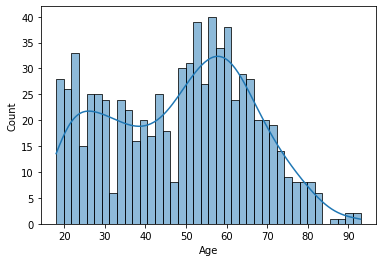

In [22]:
age = limited.Age[~limited.Age.isnull()]
sns.histplot(age, kde = True, bins = 40)
plt.show()

###### Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built in an earlier section of this problem.

### Best Presented Age Group in the Population: 60

In [23]:
limited[limited.Smartphone == 0]['Info.On.Internet'].describe()

count    285.000000
mean       2.922807
std        2.449707
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: Info.On.Internet, dtype: float64

In [24]:
maskers = limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 1)].shape[0]
non_maskers = len(limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 0)] )

print(maskers / (maskers + non_maskers))

0.19254658385093168


In [25]:
xx = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 1) ].shape[0]
yy = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 0)].shape[0]

In [26]:
print("Percentage of People that Mask their Identity while Browsing the Internet: ", xx / (xx + yy))

Percentage of People that Mask their Identity while Browsing the Internet:  0.11743772241992882
